In [1]:
from ipfx_new.ipfx_new.x_to_nwb import ABFConverter
ABFConverter.ABFConverter('examples/CC_5.abf', 'output/CC_5.nwb', includeChannelList=["IN 0"])

C:\Users\Allose\Documents\GitHub\ABF2_NWB\ipfx_new\ipfx_new\x_to_nwb\ABFConverter.py:154: UserWarning: Could not find the JSON file examples/CC_5.json with settings.
  warnings.warn(f"Could not find the JSON file {settings} with settings.")
C:\Users\Allose\Documents\GitHub\ABF2_NWB\ipfx_new\ipfx_new\x_to_nwb\ABFConverter.py:466: UserWarning: Could not find the scale factor for the stimset cc step 2, using 1.0 as fallback.
  warnings.warn(f"Could not find the scale factor for the stimset {stimset}, using {DEFAULT_SCALE_FACTOR} as fallback.")
C:\Users\Allose\Documents\GitHub\ABF2_NWB\ipfx_new\ipfx_new\x_to_nwb\ABFConverter.py:493: UserWarning: Could not find settings for amplifier unknown of channel IN 0.
  warnings.warn(f"Could not find settings for amplifier {amplifier} of channel {adcName}.")


In [2]:

# Load IPFX libraries
from ipfx.dataset.create import create_ephys_data_set
from ipfx.data_set_features import extract_data_set_features
from ipfx.utilities import drop_failed_sweeps
from ipfx.qc_feature_extractor import sweep_qc_features

# Load pandas library too
import pandas as pd
from ipfx.dataset.create import create_ephys_data_set
from ipfx.utilities import drop_failed_sweeps

file_name = "output/CC_5.nwb"

# Create Ephys Data Set

print('loading dataset into data structure...')
#nwb_file_name = '/Users/stripathy/Downloads/sub-601462951_ses-601810292_icephys.nwb'
data_set = create_ephys_data_set(nwb_file=file_name, ontology="ipfx/ipfx/defaults/stimulus_ontology.json") ##loads nwb file into ipfx data structure

#sweep = data_set.sweep(0)
# sweep_features = sweep_qc_features(data_set)
# Drop failed sweeps: sweeps with incomplete recording or failing QC criteria
drop_failed_sweeps(data_set)
# ipfx.data_set_features.extract_data_set_features(data_set, subthresh_min_amp=None)[source]

loading dataset into data structure...


C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: cc step 2
  warnings.warn("Could not find stimulus: %s" % tag)


In [3]:
from ipfx.feature_extractor import SpikeFeatureExtractor, SpikeTrainFeatureExtractor

import ipfx.stimulus_protocol_analysis as spa
from ipfx.epochs import get_stim_epoch
import matplotlib.pyplot as plt


# get sweep table of Long Square sweeps
long_square_table = data_set.filtered_sweep_table(
    stimuli=data_set.ontology.long_square_names
)
long_square_sweeps = data_set.sweep_set(long_square_table.sweep_number)

long_square_sweeps = data_set.sweep_set()

# Select epoch corresponding to the actual recording from the sweeps
# and align sweeps so that the experiment would start at the same time
long_square_sweeps.select_epoch("recording")
# long_square_sweeps.align_to_start_of_epoch("experiment")

# find the start and end time of the stimulus
# (treating the first sweep as representative)
stim_start_index, stim_end_index = get_stim_epoch(long_square_sweeps.i[0], test_pulse=False)
stim_start_time = long_square_sweeps.t[0][stim_start_index]
stim_end_time = long_square_sweeps.t[0][stim_end_index]

# stim_start_time = 0.5
# stim_end_time = 1.8

# build the extractors
spfx = SpikeFeatureExtractor(start=stim_start_time, end=stim_end_time, filter = 1)
sptfx = SpikeTrainFeatureExtractor(start=stim_start_time, end=stim_end_time)

# run the analysis and print out a few of the features
long_square_analysis = spa.LongSquareAnalysis(spfx, sptfx, subthresh_min_amp=-100.0)
data = long_square_analysis.analyze(long_square_sweeps)

fields_to_print = [
    'tau',
    'v_baseline',
    'input_resistance',
    'vm_for_sag',
    'fi_fit_slope',
    'sag',
    'rheobase_i'
]

for field in fields_to_print:
    print("%s: %s" % (field, str(data[field])))

C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: cc step 2
  warnings.warn("Could not find stimulus: %s" % tag)
C:\Users\Allose\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Could not 

INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.

INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.

INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.

INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair

tau: nan
v_baseline: -61.83976320539202
input_resistance: 80.07805049419403
vm_for_sag: -82.52564
fi_fit_slope: 0.29921967588661247
sag: 0.02169397845864296
rheobase_i: 200.0


C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus_protocol_analysis.py:219: RuntimeWarning: Mean of empty slice
  features["tau"] = np.nanmean(calc_subthresh_features['tau'])


C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\stimulus.py:88: UserWarning: Could not find stimulus: cc step 2
  warnings.warn("Could not find stimulus: %s" % tag)


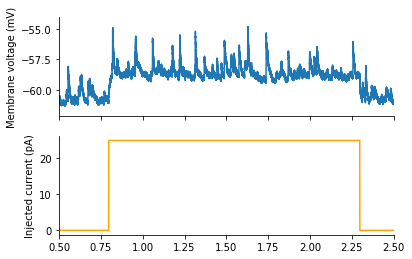

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# these are basic IPFX objects for working with sweeps and sets of sweeps
from ipfx.sweep import Sweep, SweepSet 

sweep_plot_index = 11 # which sweep number do you want to plot?

curr_sweep = data_set.sweep_set(sweep_plot_index).sweeps[0]
t = curr_sweep.t
v = curr_sweep.v
i = curr_sweep.i

fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].plot(t, v)
axes[0].set_xlim(.5, 2.5)
axes[0].set_ylabel("Membrane voltage (mV)")

axes[1].plot(t, i, c="orange")
axes[1].set_ylabel("Injected current (pA)")

sns.despine()